In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using ScientificTypes
using TableTransforms
using CSV
using DataFrames

include("./utils.jl")

Imbalance.Imbalance.SMOTEImbalance.Imbalance.ROSEImbalance.Imbalance.RandomOversamplerImbalance.Imbalance.SMOTENC

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

num_rows = 100
num_cont_feats = 4
probs = [0.5, 0.2, 0.3]

extra_cat_feats = [3, 4, 2, 5]

X, y = generate_imbalanced_data(num_rows, num_cont_feats; probs, extra_cat_feats, type = "DF")
X = coerce(X, autotype(X, :few_to_finite))
X = coerce(X, OrderedFactor=>Multiclass)

Row,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Cat…,Cat…,Cat…,Cat…
1,0.587169,0.992127,0.107208,0.81668,3.0,1.0,2.0,5.0
2,0.85567,0.257892,0.125969,0.412758,2.0,3.0,2.0,3.0
3,0.993535,0.359158,0.93526,0.589259,1.0,3.0,1.0,5.0
4,0.625667,0.957552,0.40977,0.773018,1.0,3.0,2.0,2.0
5,0.286734,0.345602,0.914571,0.641283,1.0,4.0,1.0,5.0
6,0.781458,0.810667,0.280862,0.403214,1.0,1.0,2.0,2.0
7,0.940918,0.693426,0.655504,0.684668,2.0,2.0,2.0,1.0
8,0.646747,0.764458,0.0290825,0.0699762,3.0,1.0,2.0,1.0
9,0.875763,0.403398,0.860133,0.57707,3.0,4.0,1.0,1.0


In [3]:
# For TableTransforms
Xy = CSV.read("dataset.csv", DataFrame)
y_ind = 17
Xy = coerce(Xy, autotype(Xy, :string_to_multiclass))

Row,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
,Cat…,Float64,Float64,Float64,Cat…,Float64,Float64,Cat…,Cat…,Float64,Cat…,Cat…,Cat…,Float64,Float64,Cat…,Cat…
1,Female,22.5473,1.72246,51.8813,yes,2.66342,1.04111,no,no,3.0,Frequently,yes,no,0.794402,1.39195,Public_Transportation,Body Level 1
2,Male,19.7991,1.7437,54.9275,yes,2.0,2.84726,Sometimes,no,3.28926,Sometimes,yes,no,1.68084,2.0,Public_Transportation,Body Level 1
3,Female,17.8234,1.70841,50.0,yes,1.64224,1.09923,Sometimes,no,3.45259,Sometimes,no,no,0.418875,1.0,Public_Transportation,Body Level 1
4,Female,19.0072,1.69073,49.8957,yes,1.21291,1.0297,Sometimes,no,3.20707,Sometimes,no,no,2.0,1.0,Public_Transportation,Body Level 1
5,Male,19.7293,1.79331,58.1951,yes,2.50883,2.07693,no,no,3.4359,Sometimes,yes,no,2.02667,1.44333,Automobile,Body Level 1
6,Male,18.4706,1.85641,58.674,yes,2.34222,2.31179,no,no,3.9371,Sometimes,yes,no,2.01338,1.12835,Automobile,Body Level 1
7,Male,18.0,1.7387,50.2487,yes,1.87121,1.28374,Sometimes,no,3.0,Sometimes,yes,no,0.684879,1.48722,Public_Transportation,Body Level 1
8,Female,29.9704,1.61086,49.516,yes,2.05914,2.0,no,no,3.90486,Frequently,yes,no,0.821977,0.0,Public_Transportation,Body Level 1
9,Female,23.4443,1.59647,44.5946,no,2.59465,1.91681,no,no,1.88216,Frequently,no,no,0.417119,0.0,Public_Transportation,Body Level 1


### 2. Apply SMOTE

#### Using Imbalance Only

In [4]:
Xover, yover = smotenc(X, y; k = 5, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

(174×8 DataFrame
 Row │ x1         x2         x3         x4         x5    x6    x7    x8   
     │ Float64    Float64    Float64    Float64    Cat…  Cat…  Cat…  Cat… 
─────┼────────────────────────────────────────────────────────────────────
   1 │ 0.587169   0.992127   0.107208   0.81668    3.0   1.0   2.0   5.0
   2 │ 0.85567    0.257892   0.125969   0.412758   2.0   3.0   2.0   3.0
   3 │ 0.993535   0.359158   0.93526    0.589259   1.0   3.0   1.0   5.0
   4 │ 0.625667   0.957552   0.40977    0.773018   1.0   3.0   2.0   2.0
   5 │ 0.286734   0.345602   0.914571   0.641283   1.0   4.0   1.0   5.0
   6 │ 0.781458   0.810667   0.280862   0.403214   1.0   1.0   2.0   2.0
   7 │ 0.940918   0.693426   0.655504   0.684668   2.0   2.0   2.0   1.0
   8 │ 0.646747   0.764458   0.0290825  0.0699762  3.0   1.0   2.0   1.0
  ⋮  │     ⋮          ⋮          ⋮          ⋮       ⋮     ⋮     ⋮     ⋮
 168 │ 0.724968   0.532922   0.118973   0.0679647  3.0   2.0   2.0   3.0
 169 │ 0.739775   0.335858   

#### Using MLJ

In [5]:
smotenc_model = SMOTENC(k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(smotenc_model)
Xover, yover = transform(mach, X, y)

(174×8 DataFrame
 Row │ x1         x2         x3         x4         x5    x6    x7    x8   
     │ Float64    Float64    Float64    Float64    Cat…  Cat…  Cat…  Cat… 
─────┼────────────────────────────────────────────────────────────────────
   1 │ 0.587169   0.992127   0.107208   0.81668    3.0   1.0   2.0   5.0
   2 │ 0.85567    0.257892   0.125969   0.412758   2.0   3.0   2.0   3.0
   3 │ 0.993535   0.359158   0.93526    0.589259   1.0   3.0   1.0   5.0
   4 │ 0.625667   0.957552   0.40977    0.773018   1.0   3.0   2.0   2.0
   5 │ 0.286734   0.345602   0.914571   0.641283   1.0   4.0   1.0   5.0
   6 │ 0.781458   0.810667   0.280862   0.403214   1.0   1.0   2.0   2.0
   7 │ 0.940918   0.693426   0.655504   0.684668   2.0   2.0   2.0   1.0
   8 │ 0.646747   0.764458   0.0290825  0.0699762  3.0   1.0   2.0   1.0
  ⋮  │     ⋮          ⋮          ⋮          ⋮       ⋮     ⋮     ⋮     ⋮
 168 │ 0.724968   0.532922   0.118973   0.0679647  3.0   2.0   2.0   3.0
 169 │ 0.739775   0.335858   

#### Using TableTransforms

In [6]:
Xy

Row,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
,Cat…,Float64,Float64,Float64,Cat…,Float64,Float64,Cat…,Cat…,Float64,Cat…,Cat…,Cat…,Float64,Float64,Cat…,Cat…
1,Female,22.5473,1.72246,51.8813,yes,2.66342,1.04111,no,no,3.0,Frequently,yes,no,0.794402,1.39195,Public_Transportation,Body Level 1
2,Male,19.7991,1.7437,54.9275,yes,2.0,2.84726,Sometimes,no,3.28926,Sometimes,yes,no,1.68084,2.0,Public_Transportation,Body Level 1
3,Female,17.8234,1.70841,50.0,yes,1.64224,1.09923,Sometimes,no,3.45259,Sometimes,no,no,0.418875,1.0,Public_Transportation,Body Level 1
4,Female,19.0072,1.69073,49.8957,yes,1.21291,1.0297,Sometimes,no,3.20707,Sometimes,no,no,2.0,1.0,Public_Transportation,Body Level 1
5,Male,19.7293,1.79331,58.1951,yes,2.50883,2.07693,no,no,3.4359,Sometimes,yes,no,2.02667,1.44333,Automobile,Body Level 1
6,Male,18.4706,1.85641,58.674,yes,2.34222,2.31179,no,no,3.9371,Sometimes,yes,no,2.01338,1.12835,Automobile,Body Level 1
7,Male,18.0,1.7387,50.2487,yes,1.87121,1.28374,Sometimes,no,3.0,Sometimes,yes,no,0.684879,1.48722,Public_Transportation,Body Level 1
8,Female,29.9704,1.61086,49.516,yes,2.05914,2.0,no,no,3.90486,Frequently,yes,no,0.821977,0.0,Public_Transportation,Body Level 1
9,Female,23.4443,1.59647,44.5946,no,2.59465,1.91681,no,no,1.88216,Frequently,no,no,0.417119,0.0,Public_Transportation,Body Level 1


In [7]:
y_ind = 17
smote_model_t = SMOTENC_t(y_ind, ratios=Dict(1=> 1.2, 2=>1.2, 3=>1.2, 4=>1.2), rng=42)
Xyover = Xy |> smote_model_t

Row,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
,Cat…,Float64,Float64,Float64,Cat…,Float64,Float64,Cat…,Cat…,Float64,Cat…,Cat…,Cat…,Float64,Float64,Cat…,Cat…
1,Female,22.5473,1.72246,51.8813,yes,2.66342,1.04111,no,no,3.0,Frequently,yes,no,0.794402,1.39195,Public_Transportation,Body Level 1
2,Male,19.7991,1.7437,54.9275,yes,2.0,2.84726,Sometimes,no,3.28926,Sometimes,yes,no,1.68084,2.0,Public_Transportation,Body Level 1
3,Female,17.8234,1.70841,50.0,yes,1.64224,1.09923,Sometimes,no,3.45259,Sometimes,no,no,0.418875,1.0,Public_Transportation,Body Level 1
4,Female,19.0072,1.69073,49.8957,yes,1.21291,1.0297,Sometimes,no,3.20707,Sometimes,no,no,2.0,1.0,Public_Transportation,Body Level 1
5,Male,19.7293,1.79331,58.1951,yes,2.50883,2.07693,no,no,3.4359,Sometimes,yes,no,2.02667,1.44333,Automobile,Body Level 1
6,Male,18.4706,1.85641,58.674,yes,2.34222,2.31179,no,no,3.9371,Sometimes,yes,no,2.01338,1.12835,Automobile,Body Level 1
7,Male,18.0,1.7387,50.2487,yes,1.87121,1.28374,Sometimes,no,3.0,Sometimes,yes,no,0.684879,1.48722,Public_Transportation,Body Level 1
8,Female,29.9704,1.61086,49.516,yes,2.05914,2.0,no,no,3.90486,Frequently,yes,no,0.821977,0.0,Public_Transportation,Body Level 1
9,Female,23.4443,1.59647,44.5946,no,2.59465,1.91681,no,no,1.88216,Frequently,no,no,0.417119,0.0,Public_Transportation,Body Level 1


### 3. Plot the Results

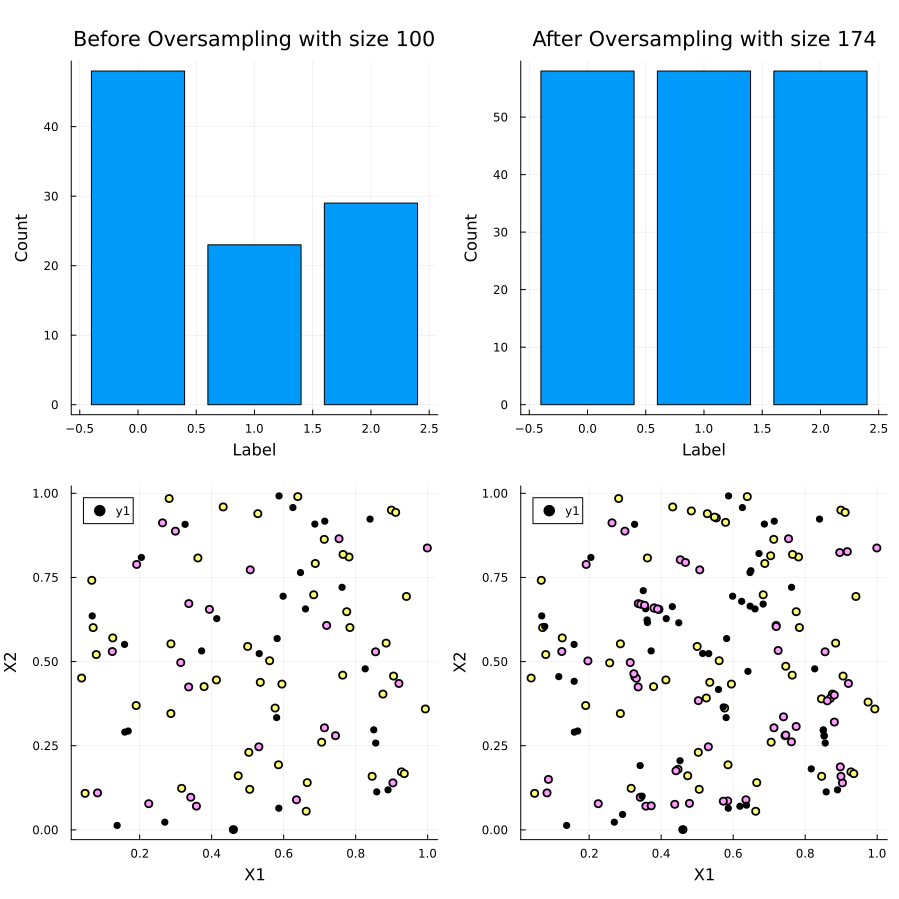

In [8]:
plot_data(y, yover, X, Xover)